<a href="https://colab.research.google.com/github/sedrisella/Pemrograman-python/blob/main/Task_7_modul_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK 7 MODUL 11

##Machine Learning : Prediksi Penumpang yang Selamat di Kapal Titanic dengan Regresi Logistik dan K-Nearest Neighbors

In [2]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sb 


In [3]:
df=pd.read_csv('titanic_dataset.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#menampilkan plot
import matplotlib.pyplot as plt


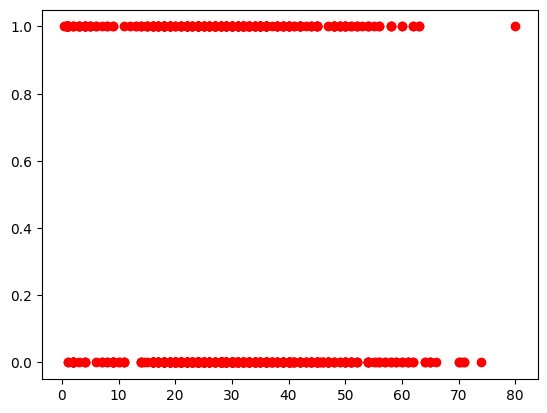

In [5]:
plt.scatter(df.Age, df.Survived, color='red', marker='o')
plt.show()

In [6]:
#metode ini mencetak informasi tentang DataFrame termasuk tipe data dan tipe kolom
#nilai-nilai non-null dan penggunaan memory
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Isnull()
import matplotlib.pyplot as plt
print(df.isnull())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [8]:
#Jumlah null pada kolom
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


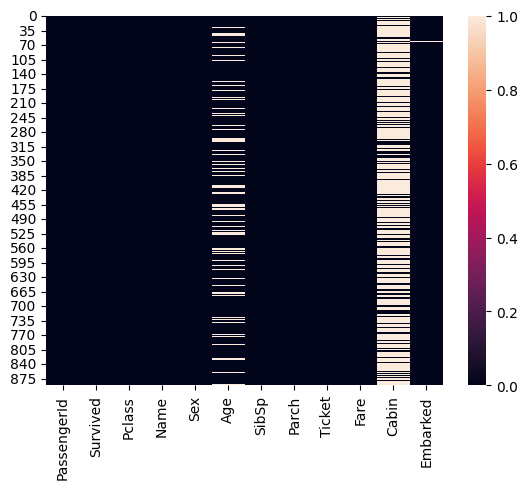

In [9]:
#melihat data data kosong yang kosom pada kolom
sb.heatmap(df.isnull())
plt.show()

In [11]:
#Kolom age mengandung bebrapa nilai yang hilang 
#jadi tidak perlu menghapus satu kolom
df.dropna(inplace=True)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

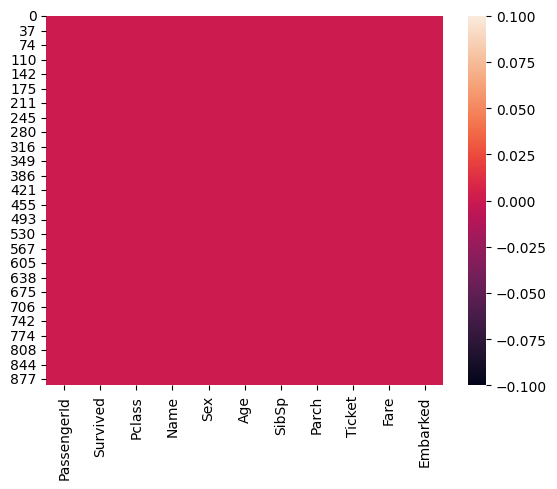

In [12]:
sb.heatmap(df.isnull())
plt.show()


In [17]:
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [18]:
#Membuat model prediksi
import pandas as pd
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['Age']],df.Survived,train_size=0.9)
print(x_test)

      Age
641  24.0
443  28.0
147   9.0
543  32.0
162  26.0
..    ...
362  45.0
15   55.0
110  47.0
442  25.0
704  26.0

[72 rows x 1 columns]


In [19]:
#menampilkan x_train
print(x_train)


      Age
222  51.0
750   4.0
812  35.0
627  21.0
161  40.0
..    ...
143  19.0
765  51.0
292  36.0
369  24.0
705  39.0

[640 rows x 1 columns]


In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [29]:
model.predict((x_test))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [30]:
model.score(x_test, y_test)

0.5972222222222222

In [33]:
model.predict(([[43]]))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [32]:
#KNN
from sklearn import neighbors
from sklearn.model_selection import train_test_split


In [34]:
x_train,x_test,y_train,y_test=train_test_split(df[['Age']],df.Survived,train_size=0.9)

In [23]:
import math 

In [24]:
print (math.sqrt(891))

29.8496231131986


In [25]:
model_knn=neighbors.KNeighborsClassifier(n_neighbors=29)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [26]:
model_knn.score(x_test,y_test)

0.6388888888888888

In [27]:
model_knn.predict(x_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0])

In [28]:
model_knn.predict([[35]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])